<a href="https://colab.research.google.com/github/Sairanga-Putta/Data_Analysis/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import fetch_california_housing

Creating Dataframe


In [ ]:
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

Exploratory Data Analysis

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

MedInc: median income in block group

HouseAge: median house age in block group

AveRooms: average number of rooms per household

AveBedrms: average number of bedrooms per household

Population: block group population

AveOccup: average number of household members

Latitude: block group latitude

Longitude: block group longitude

In [ ]:
df['Price']=california.target

In [ ]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
df.tail()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
20635    -121.09  0.781  
20636    -121.21  0.771  
20637    -121.22  0.923  
20638    -121.32  0.847  
20639    -121.24  0.894

In [ ]:
df.shape

(20640, 9)

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [ ]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

In [ ]:
df.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
Price          3842
dtype: int64

In [ ]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [ ]:
df.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

In [ ]:
df.corr

<bound method DataFrame.corr of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

<Axes: >

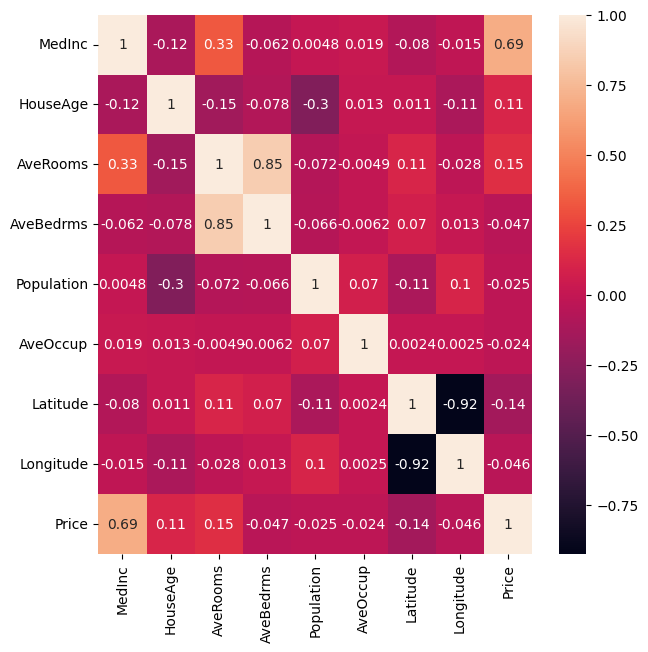

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


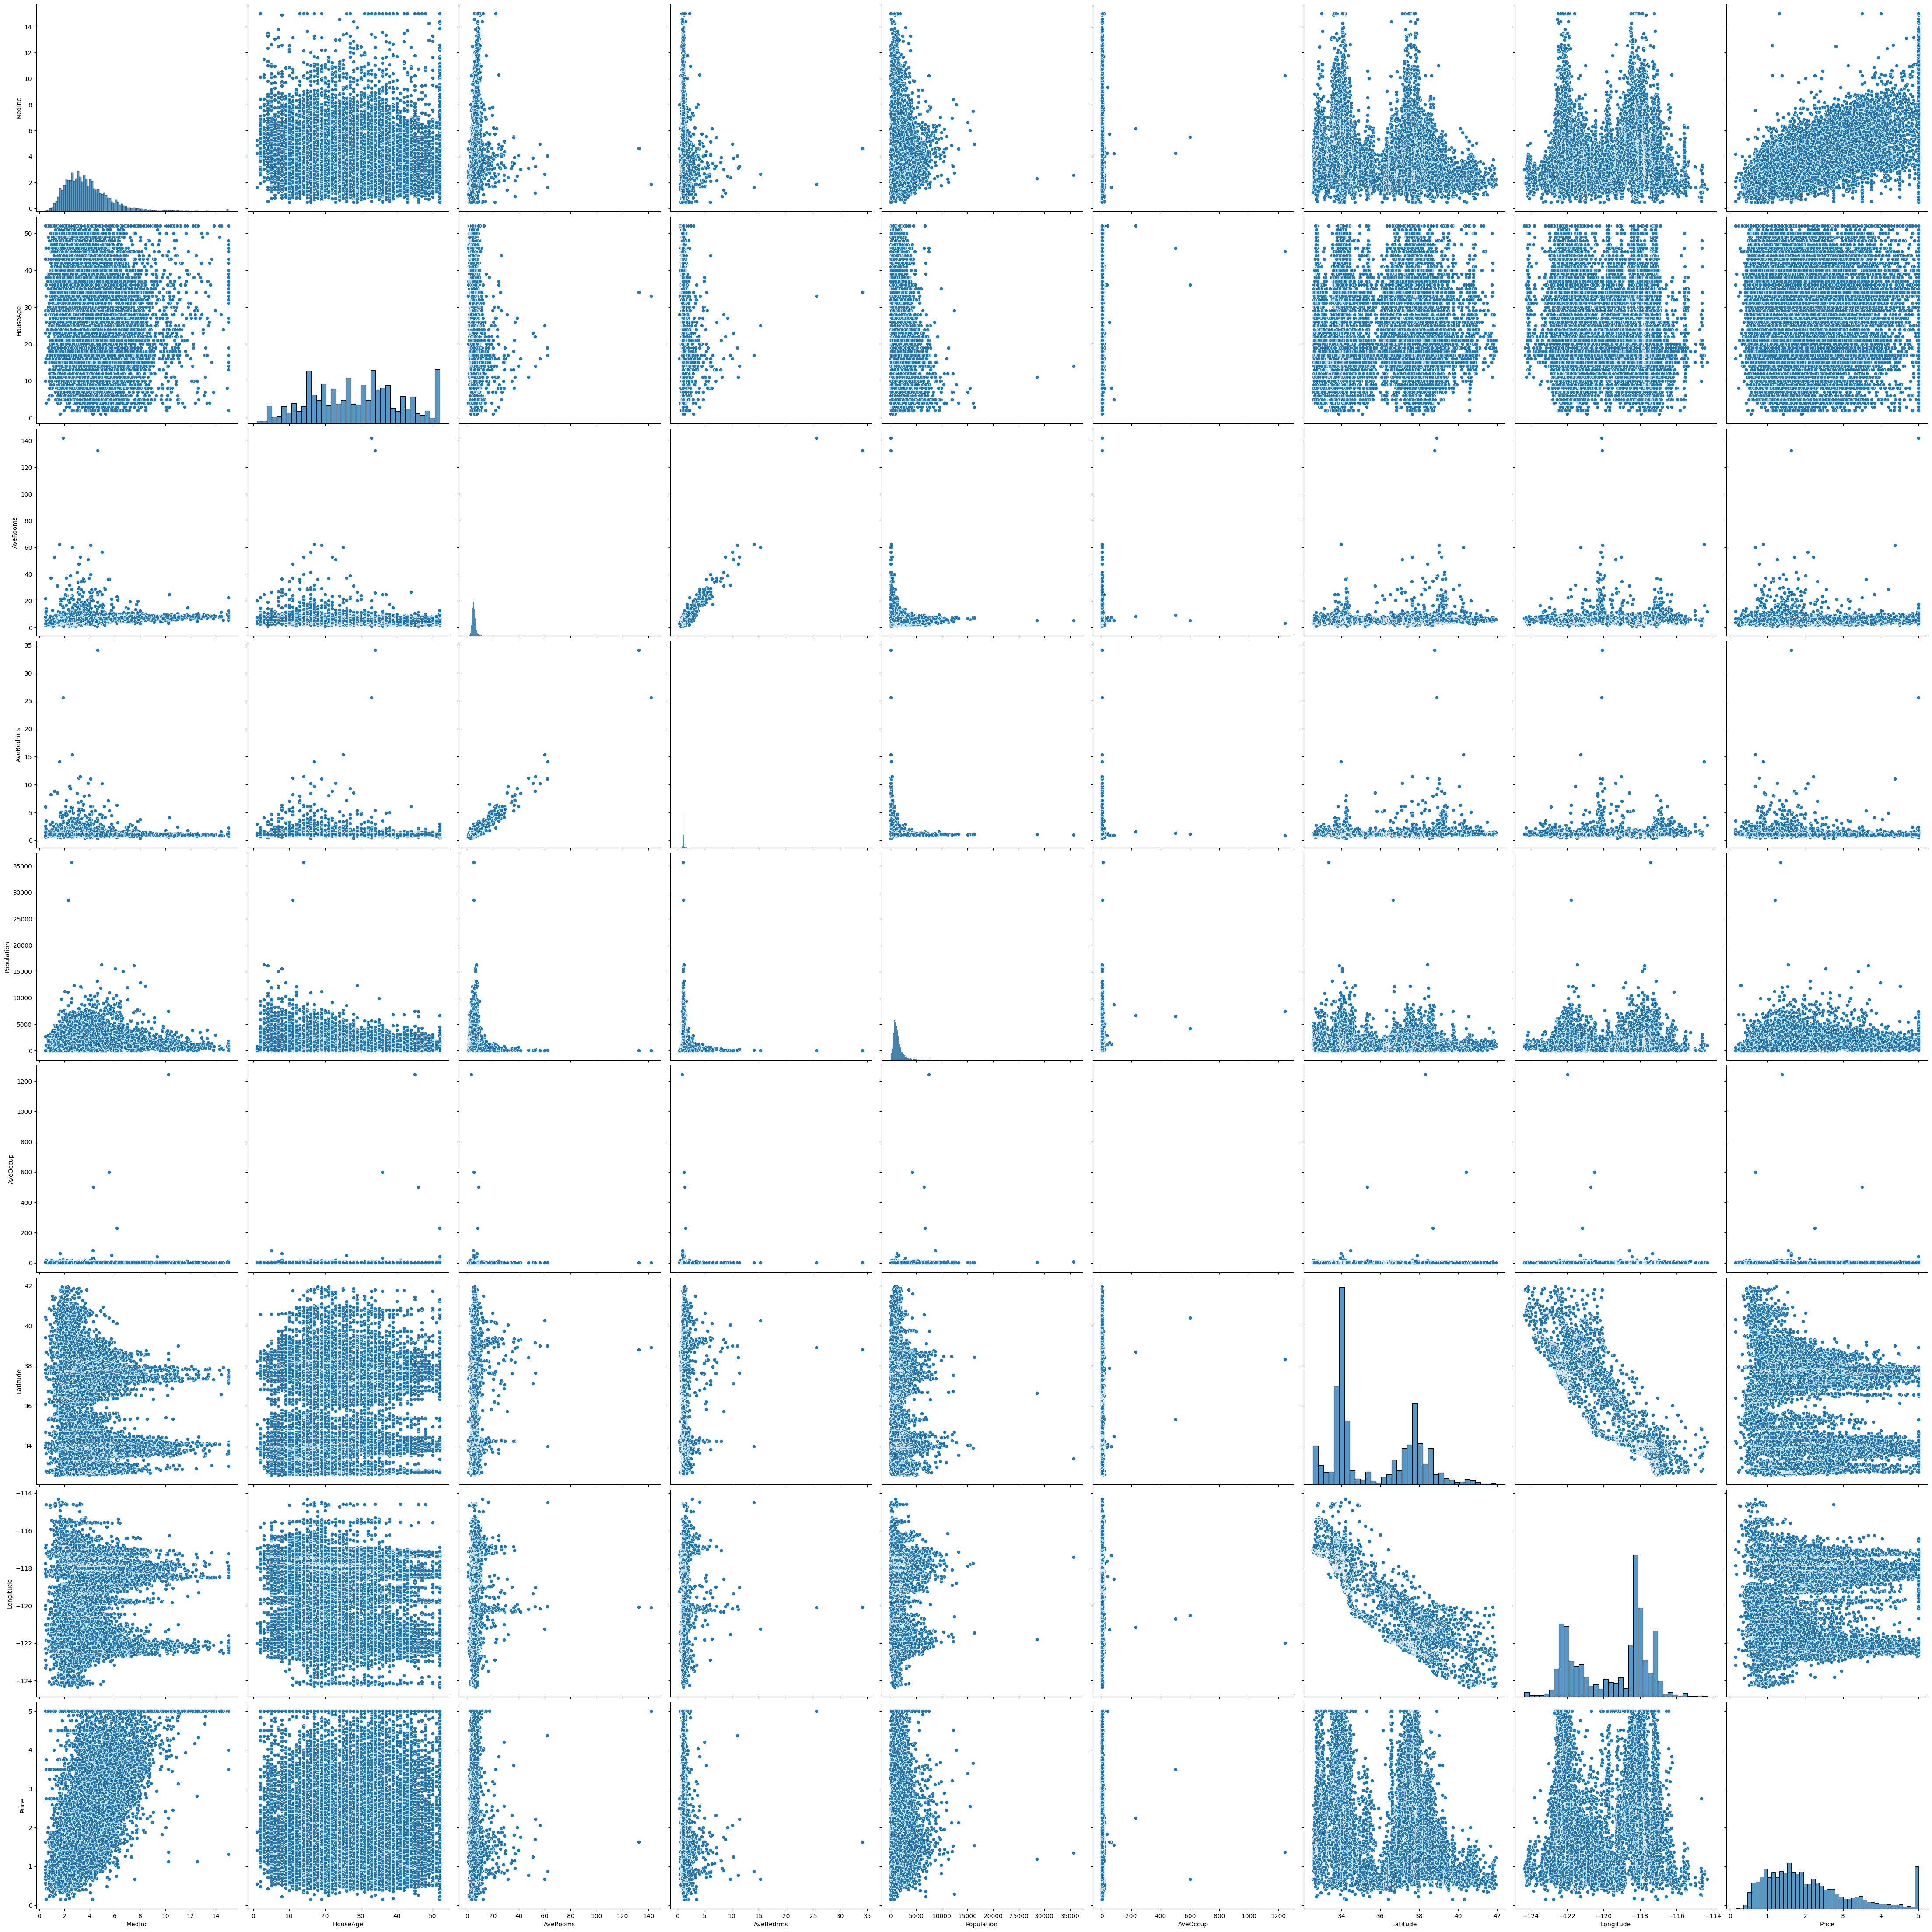

In [ ]:
sns.pairplot(df,size=5)

<Axes: >

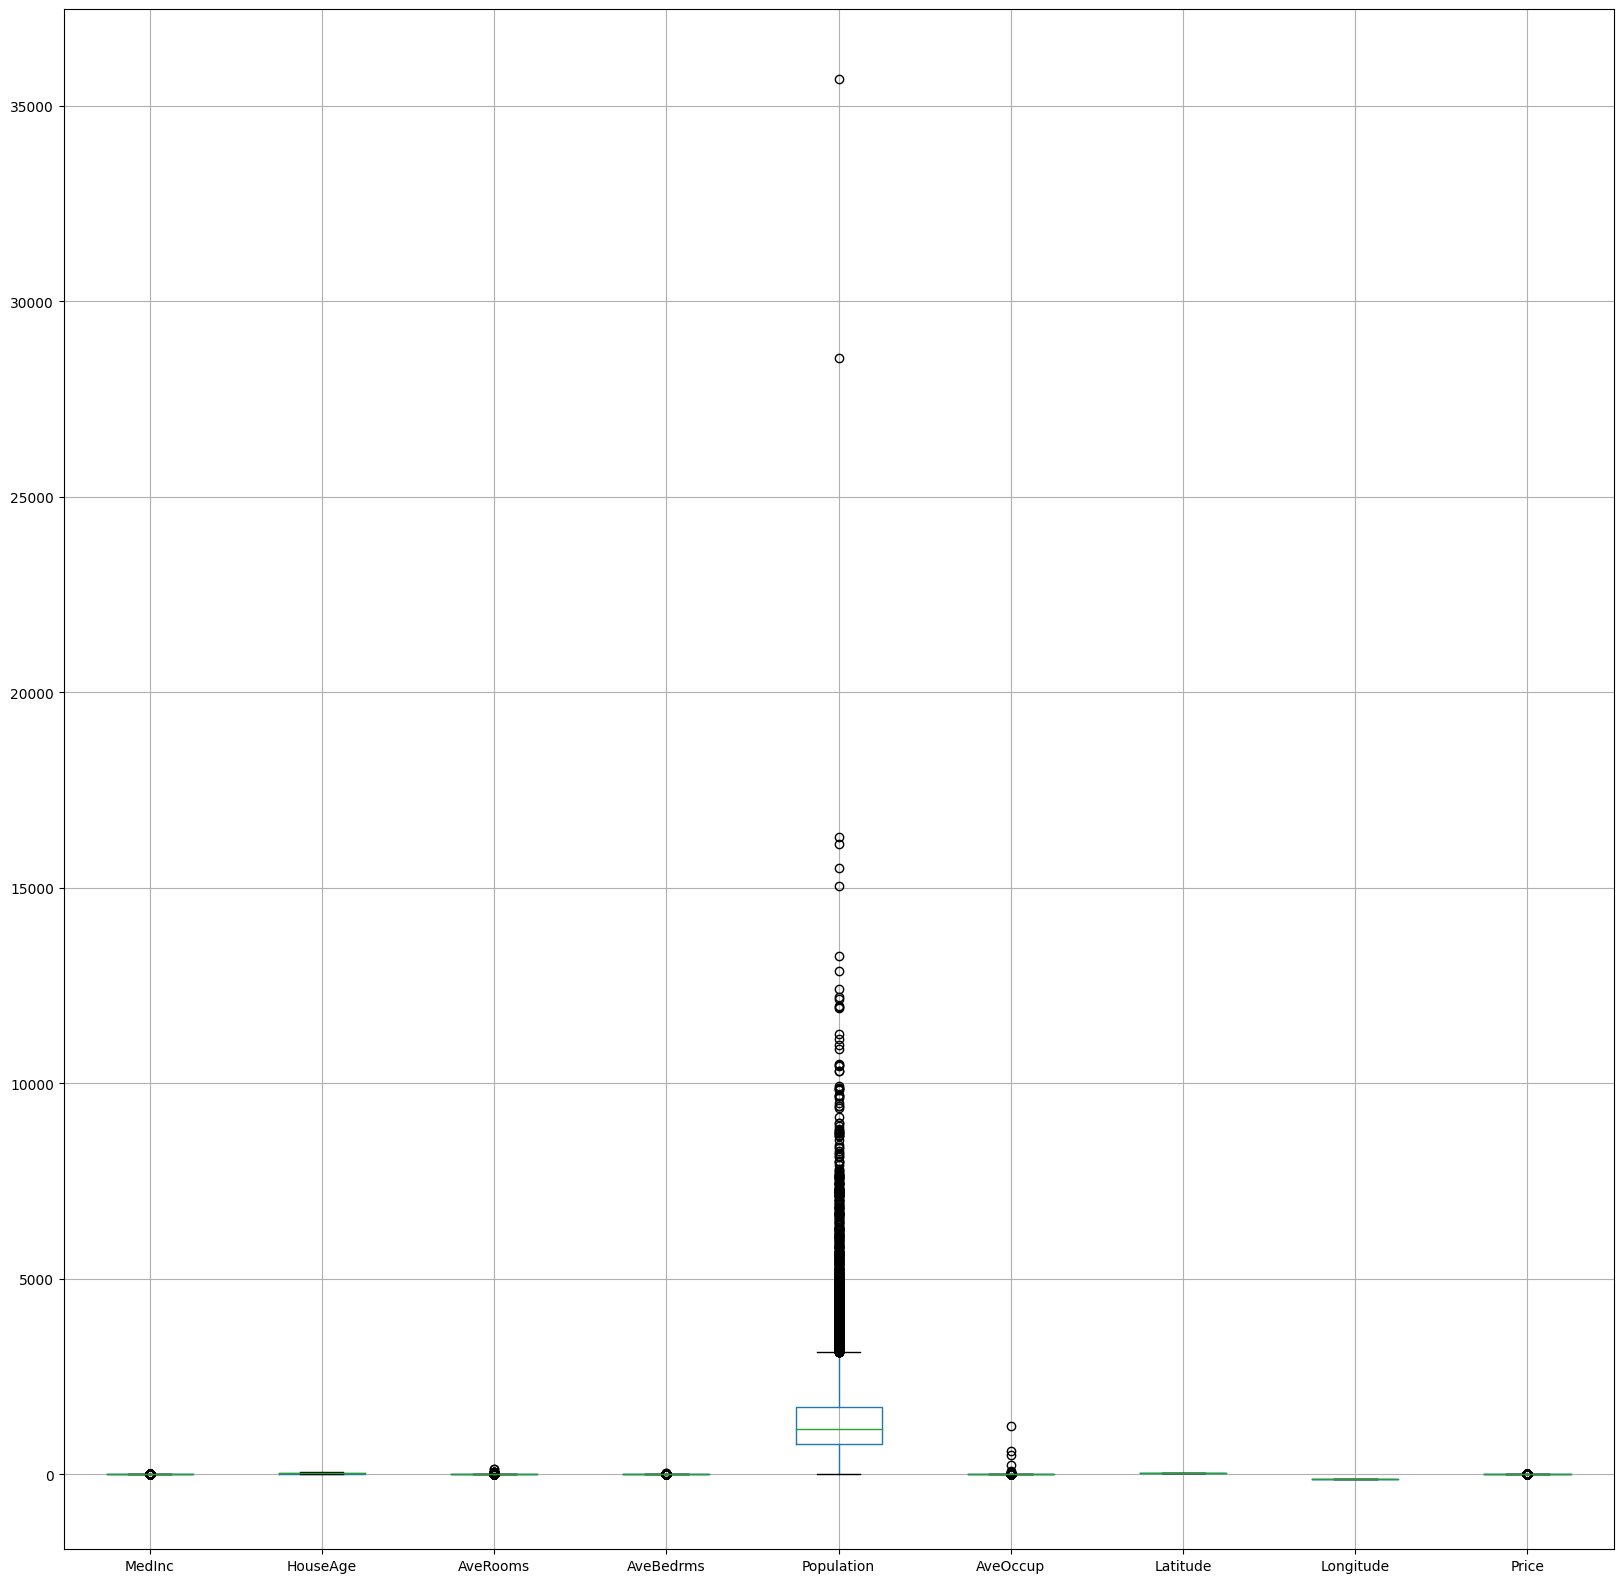

In [ ]:
plt.figure(figsize=(20,20))
df.boxplot()

Machine learning-Linear Regression

In [ ]:
min(df.Price)

0.14999

In [ ]:
df.Price.std()

1.1539561587441387

In [ ]:
x=df.iloc[:,:-1]
x

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [ ]:
np.array(x)

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

array([[   8.3252    ,   41.        ,    6.98412698, ...,   37.88      ,
        -122.23      ,    4.526     ],
       [   8.3014    ,   21.        ,    6.23813708, ...,   37.86      ,
        -122.22      ,    3.585     ],
       [   7.2574    ,   52.        ,    8.28813559, ...,   37.85      ,
        -122.24      ,    3.521     ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,   39.43      ,
        -121.22      ,    0.923     ],
       [   1.8672    ,   18.        ,    5.32951289, ...,   39.43      ,
        -121.32      ,    0.847     ],
       [   2.3886    ,   16.        ,    5.25471698, ...,   39.37      ,
        -121.24      ,    0.894     ]])

In [ ]:
x=np.array(df.drop('Price',axis=1))
y=np.array(df.Price)

splitting data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [ ]:
len(ytrain)

16512

In [ ]:
len(xtrain)

16512

In [ ]:
len(xtest)

4128

In [ ]:
len(ytest)

4128

choosing the model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#interceptvalue
model.intercept_

-36.97522792849097

In [ ]:
model.coef_

array([ 4.32655499e-01,  9.18528586e-03, -1.00803153e-01,  6.10433387e-01,
       -7.15688236e-06, -4.05072569e-03, -4.24866790e-01, -4.36114707e-01])

In [ ]:
ypred=model.predict(xtest)

In [ ]:
ytest

array([1.963, 2.75 , 1.275, ..., 1.372, 1.265, 0.999])

In [ ]:
ypred

array([1.72069275, 2.893637  , 1.88047024, ..., 1.35829027, 2.11361102,
       0.94753699])

In [ ]:
model.score(xtest,ytest)

0.6055190474770138

In [ ]:
r2_score(ytest,ypred)

0.6055190474770138

In [ ]:
mean_squared_error(ytest,ypred)

0.5124717232649112

In [ ]:
mean_absolute_error(ytest,ypred)

0.5259247603143382

In [ ]:
#rmse
np.sqrt(mean_squared_error(ytest,ypred))

0.7158713035629457

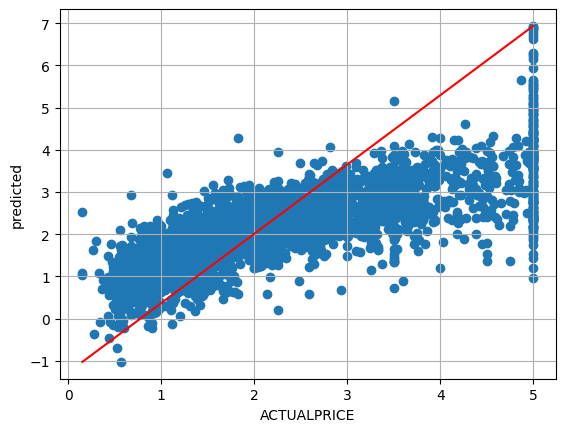

In [ ]:
plt.scatter(ytest,ypred)
plt.xlabel('ACTUALPRICE')
plt.ylabel('predicted')
plt.grid()
plt.plot([min(ytest),max(ytest)],[min(ypred),max(ypred)],color='red')

klib

In [ ]:
pip install klib

In [ ]:
import klib
import pandas as pd
from sklearn.datasets import load_diabetes,load_iris

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

GridSpec(6, 5)

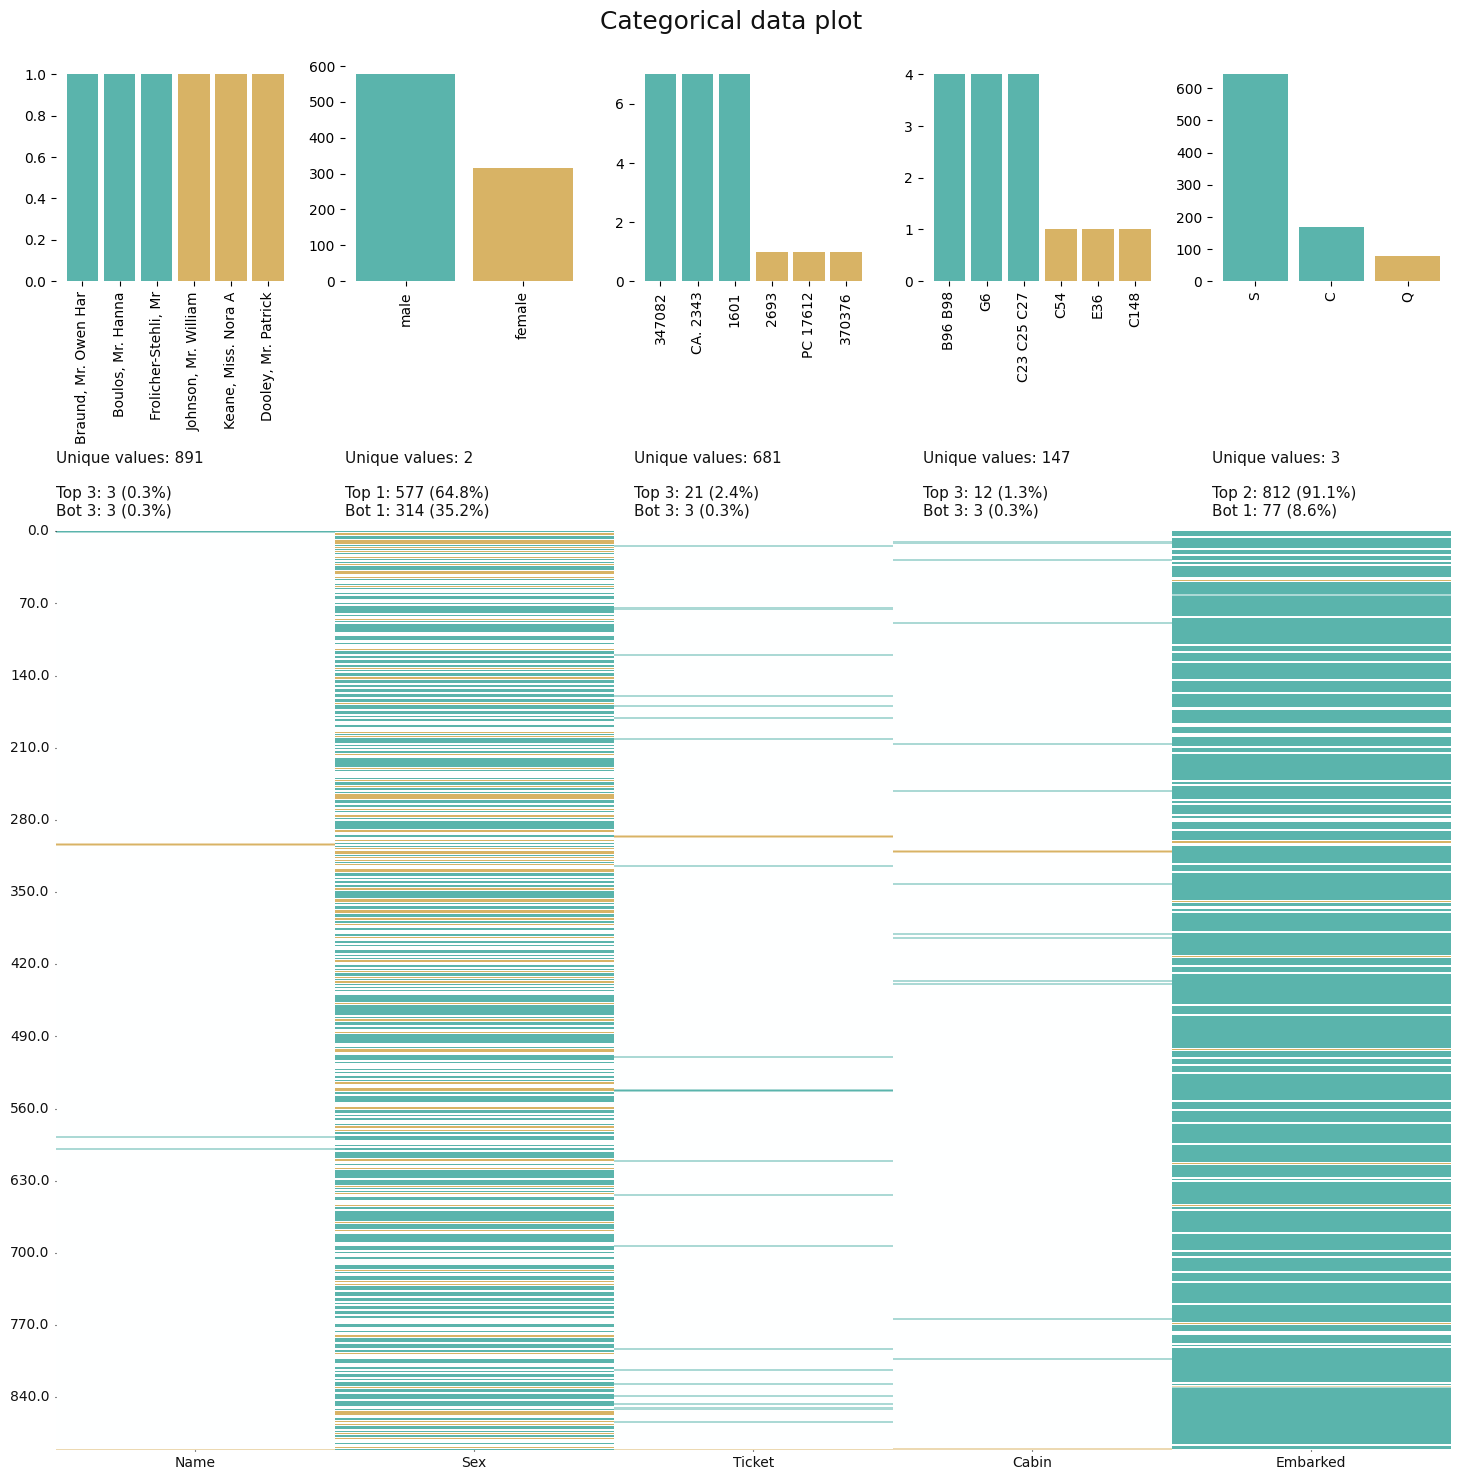

In [ ]:
klib.cat_plot(df)#visualizes categorical data and frequency of data,THE colored lines are null values

In [ ]:
klib.corr_mat(df)#return a color-encoded corelation matrix

<Axes: title={'center': 'Feature-correlation (pearson)'}>

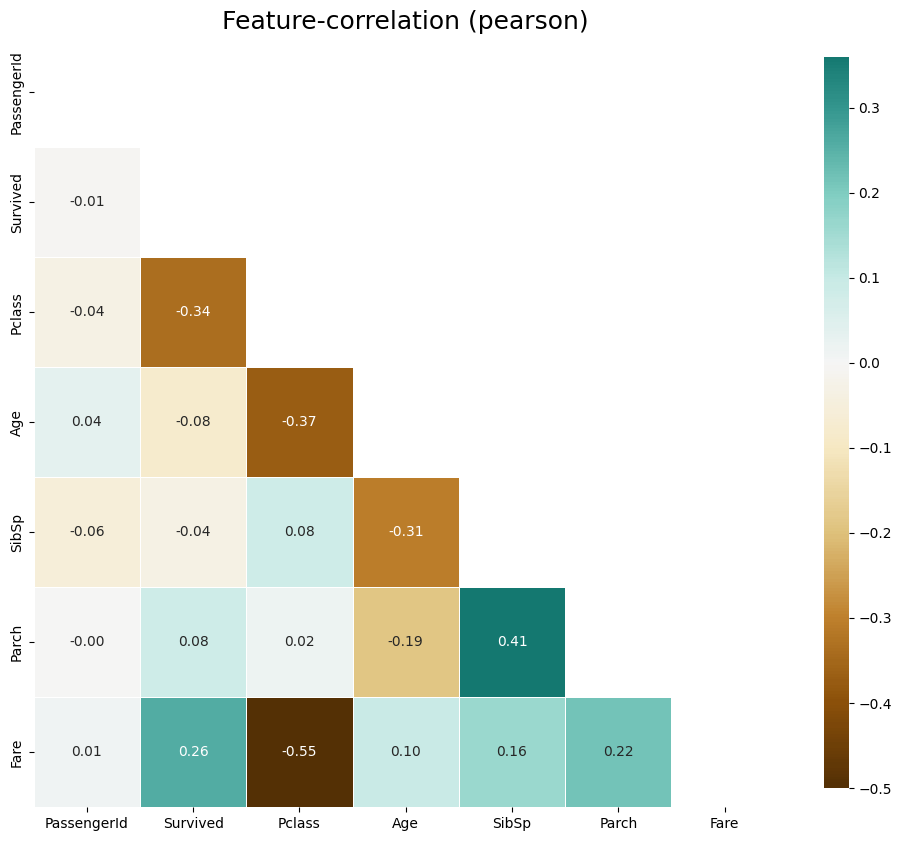

In [ ]:
klib.corr_plot(df)#returns heat map

<Axes: xlabel='Fare', ylabel='Density'>

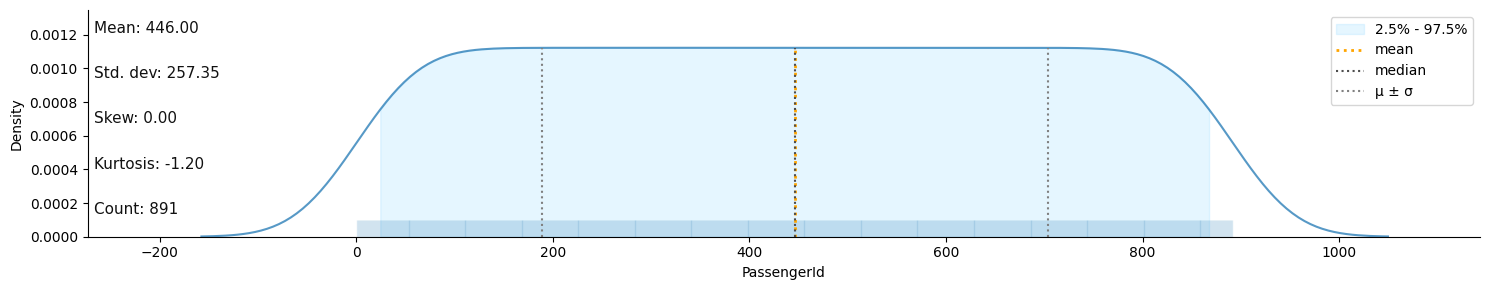

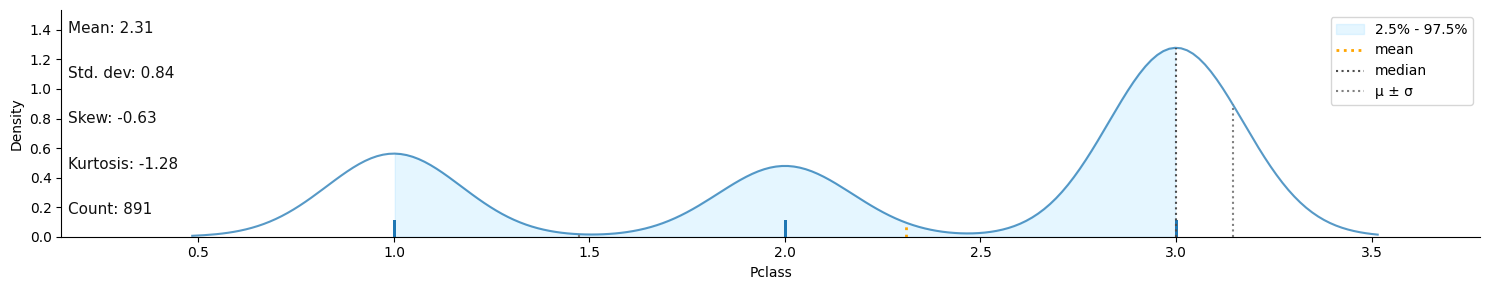

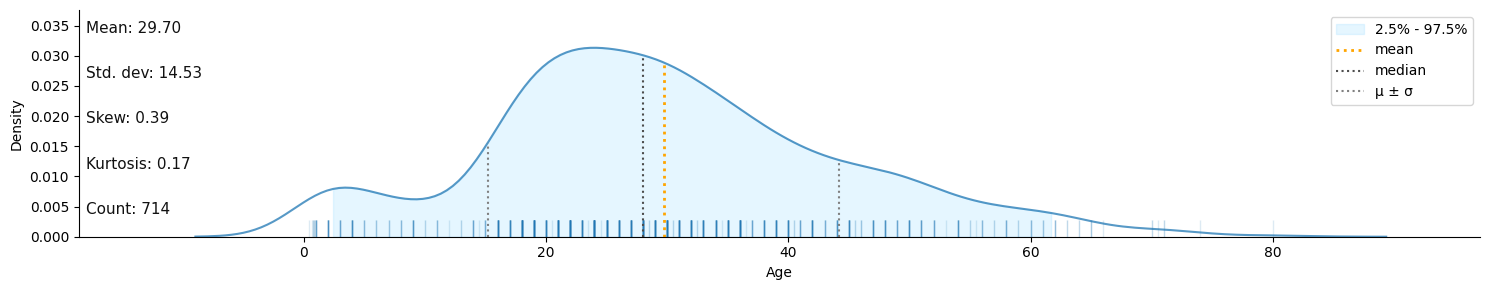

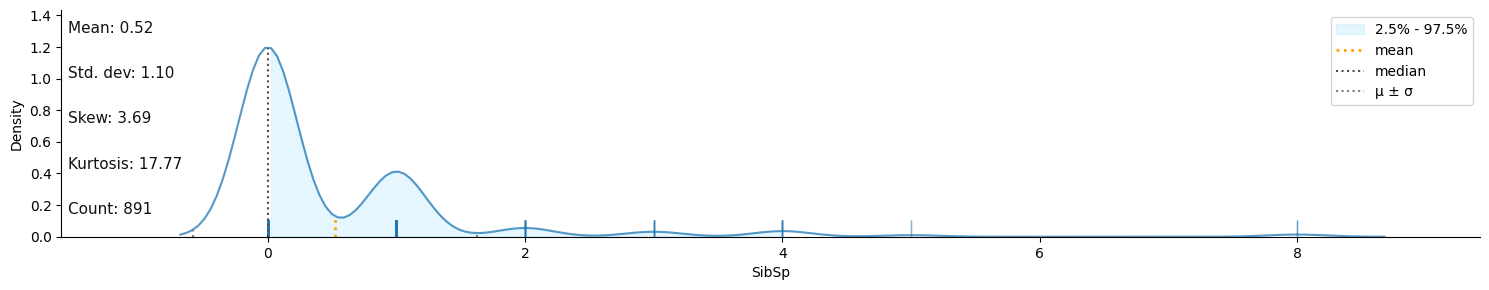

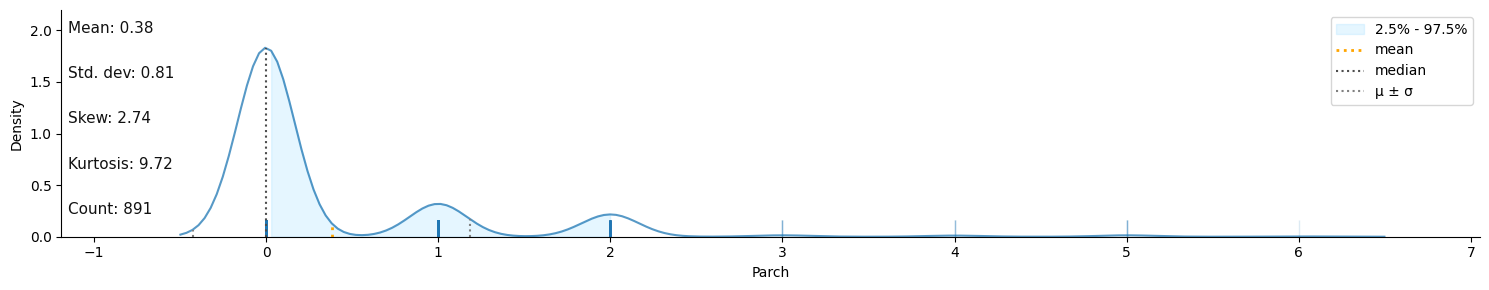

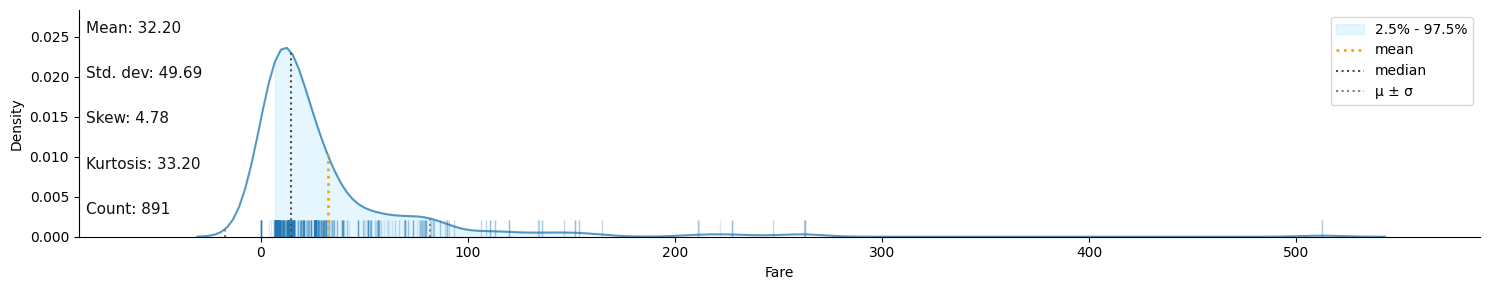

In [ ]:
klib.dist_plot(df)#retruns distibutions

GridSpec(6, 6)

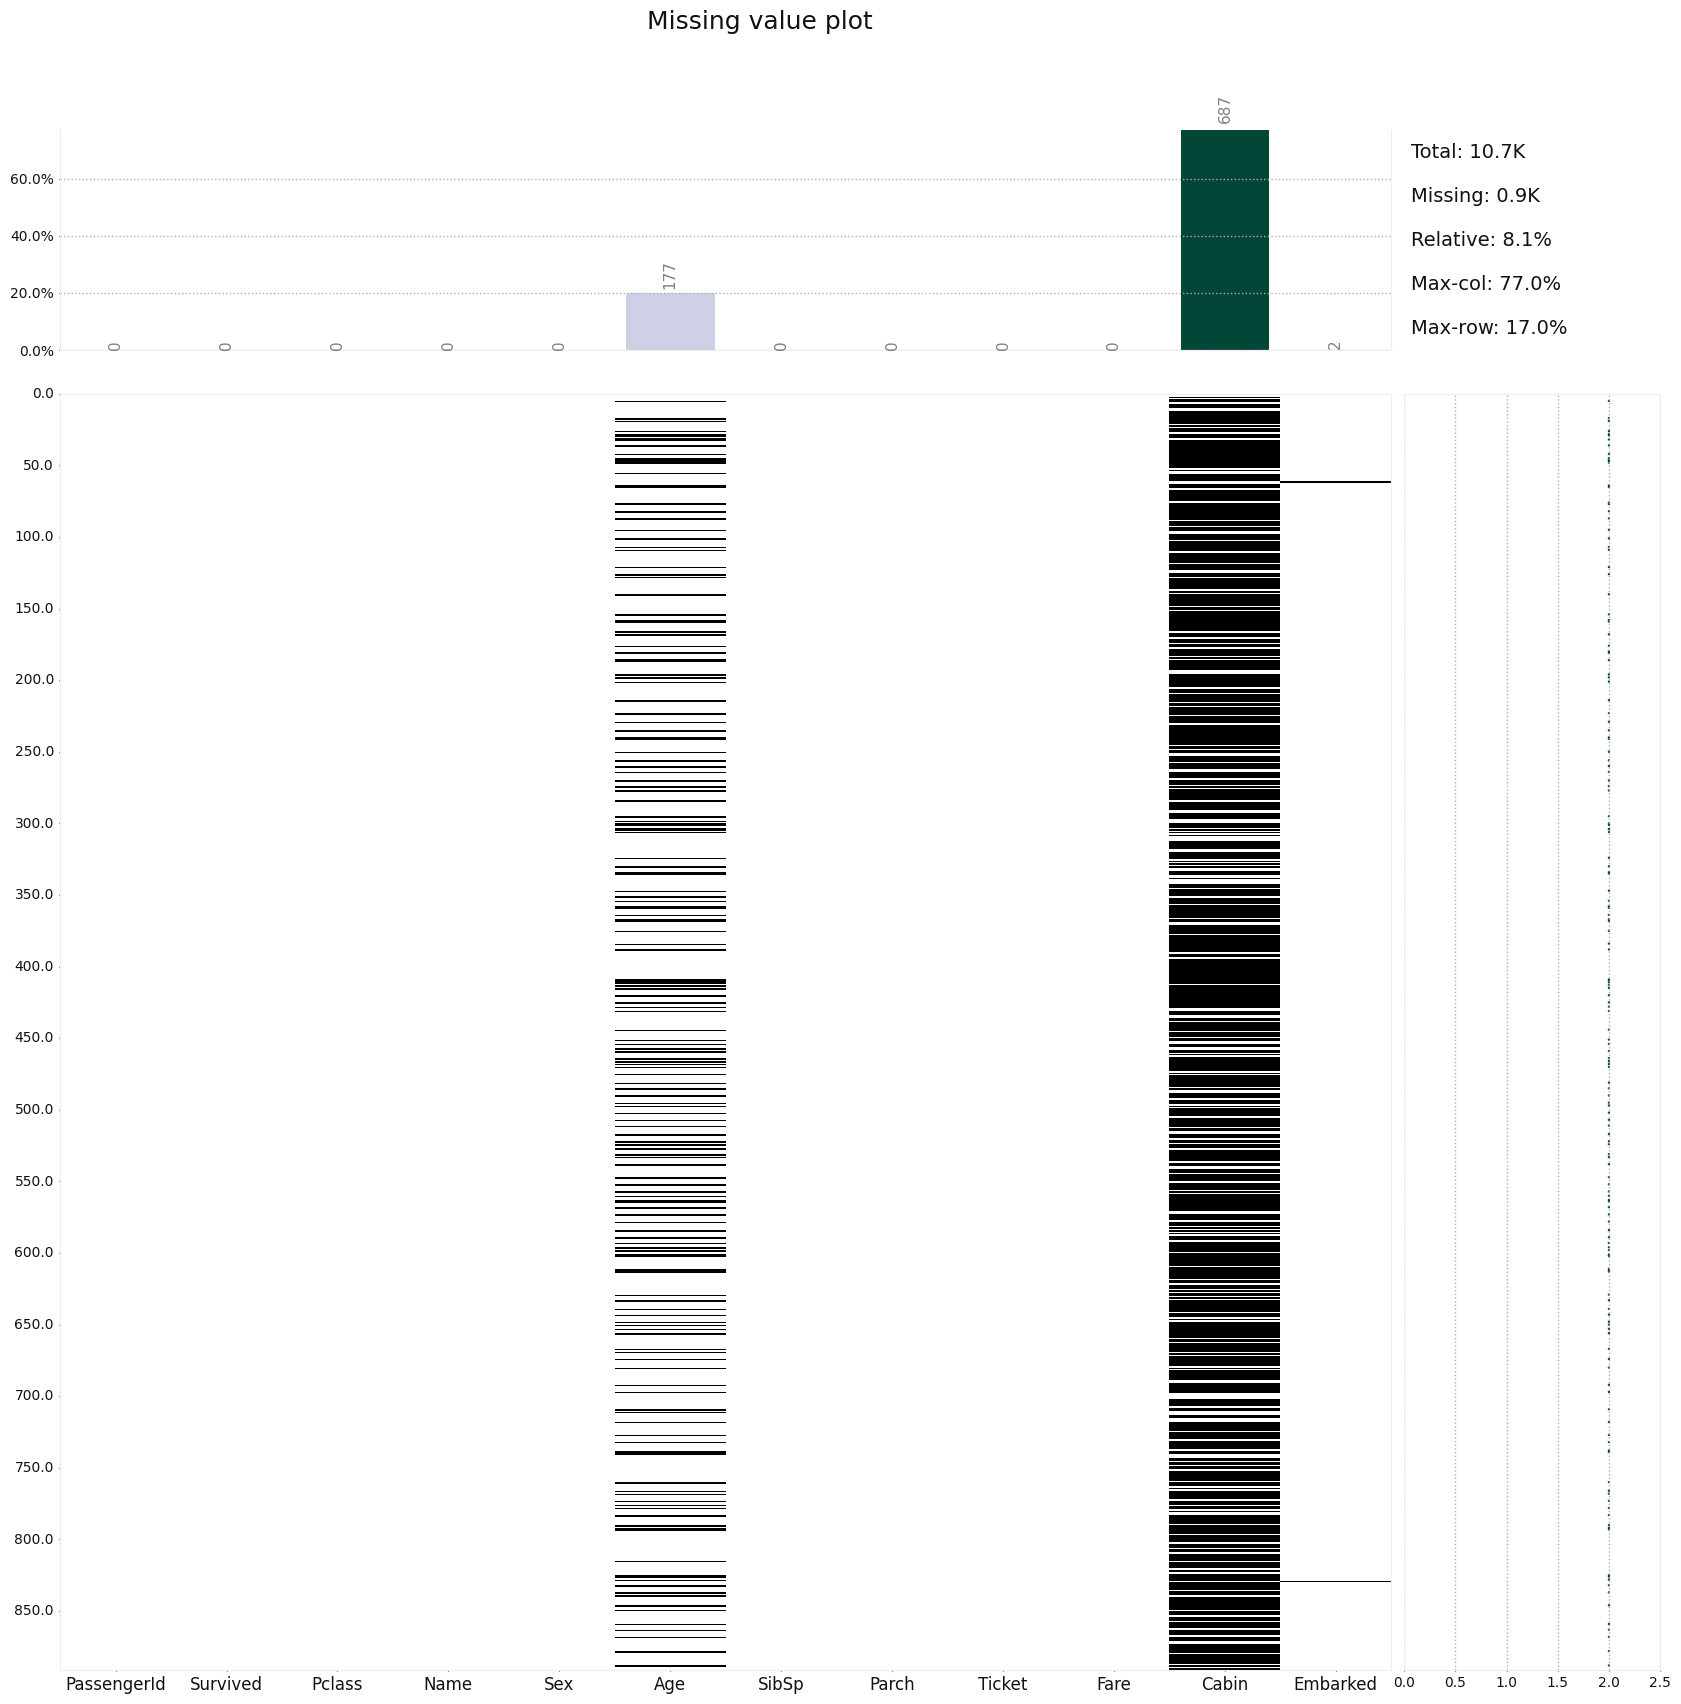

In [ ]:
klib.missingval_plot(df)

In [ ]:
#klib used for cleaning datasets also check the site for more